# Plastic Pollution from River Sources

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [14]:
os.listdir(".")

['.config', 'plastics-top-rivers.csv', 'sample_data']

In [15]:
filename = "plastics-top-rivers.csv"
score_df = pd.read_csv(filename)
score_df.head()

,Entity,Country,sharePlastics,plasticWaste
0,Agno,Philippines,0.469647,29587790
1,Agusan,Philippines,0.469647,29587790
2,Bharathappuzha,India,0.357340,22512450
3,Cagayan River,Philippines,0.234824,14793900
4,Cagayan de Oro,Philippines,0.265453,16723530


Looking at the csv we see that we are only working with four columns of data. This is going to be less focused on checking data viablility and more about exploring what the data has to offer.

In [28]:
score_df.rename(columns={"Entity":"River", "sharePlastics":"globalPercentage"},inplace=True)
score_df.head()

,River,Country,globalPercentage,plasticWaste
0,Agno,Philippines,0.469647,29587790
1,Agusan,Philippines,0.469647,29587790
2,Bharathappuzha,India,0.357340,22512450
3,Cagayan River,Philippines,0.234824,14793900
4,Cagayan de Oro,Philippines,0.265453,16723530


In [17]:
score_df.dtypes

River                object
Country              object
globalPercentage    float64
plasticWaste          int64
dtype: object

In [18]:
print (score_df)

                     River             Country  globalPercentage  plasticWaste
0                     Agno         Philippines          0.469647      29587790
1                   Agusan         Philippines          0.469647      29587790
2           Bharathappuzha               India          0.357340      22512450
3            Cagayan River         Philippines          0.234824      14793900
4           Cagayan de Oro         Philippines          0.265453      16723530
5              Chao Phraya            Thailand          0.408389      25728520
6           Chenzhen River               China          0.296082      18653170
7            Chilyar River               India          0.234824      14793900
8                Cilliwung           Indonesia          0.285872      18009960
9              Davao River         Philippines          0.265453      16723530
10          Douala Estuary            Cameroon          0.234824      14793900
11            Ebrie Lagoon       Cote d'Ivoire      

In [19]:
countries = score_df.groupby(['Country']).sum()
countries

,globalPercentage,plasticWaste
Country,,
Bangladesh,0.265453,16723530
Brazil,0.265453,16723530
Cameroon,0.520696,32803860
China,0.918876,57889150
Cote d'Ivoire,0.336921,21226030
Dominican Republic,0.224614,14150680
India,3.940955,248280170
Indonesia,0.285872,18009960
Malaysia,2.429915,153084660


Now that we have the waste by volume we can start to see how much trash is being added to the ocean each year as both a total and from different rivers and countries.

In [27]:
sumScores = score_df['plasticWaste'].sum()
sumScores

1700654810

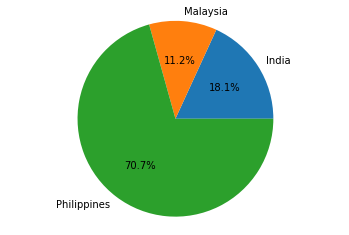

In [26]:
countryList = ['India', 'Malaysia', 'Philippines']
wasteAmount = [24828017, 15308466, 96674893]

fig, ax = plt.subplots()
ax.pie(wasteAmount, labels = countryList, autopct='%1.1f%%')

ax.axis('equal')

plt.show()

Out of the top 3 countries that contribute to plastic pollution the most the Plilippines contributes the most plastic waste into their rivers. Let's take a closer look at the Philippines to see where exactly the waste is coming from.

In [47]:
score_df.sort_values(by='Country', ascending=True)

,River,Country,globalPercentage,plasticWaste
19,Karnaphuli,Bangladesh,0.265453,16723530
39,Rio Pavuna,Brazil,0.265453,16723530
10,Douala Estuary,Cameroon,0.234824,14793900
46,Wouri River,Cameroon,0.285872,18009960
14,Huangpu,China,0.367550,23155660
6,Chenzhen River,China,0.296082,18653170
49,Zhujiang,China,0.255243,16080320
11,Ebrie Lagoon,Cote d'Ivoire,0.336921,21226030
38,Rio Ozama,Dominican Republic,0.224614,14150680
7,Chilyar River,India,0.234824,14793900


As we can see the Pililppines has 19 rivers that are contributing to plastic pollution. India has 9 rivers and is the second highest polluter and Malaysia which has 5 rivers is the third highest polluter. Now let us see if the number of rivers has any further impact on the amount of pollution. 

In [ ]:
countryList = ['Bangladesh', 'Brazil', 'Cameroon', 'China', "Cote d'Ivoire", 'Dominican Republic', 'India', 'Indonesia', 'Malaysia', 'Myamnar', 'Nigeria', 'Philippines', 'Sri Lanka', 'Tanzania', 'Thailand', 'Vietnam']
